<a href="https://colab.research.google.com/github/datalifelab/corso-open-notebook-science/blob/master/colaboratory_file_di_partenza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/datalifelab/corso-open-notebook-science/blob/master/colaboratory_file_di_partenza.ipynb)

In [0]:
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/marradi.py
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/tools.py
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/prepare_vm.py
#!pip install --upgrade numpy
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
import pandas as pd

from prepare_vm import *

--2019-10-09 07:14:18--  https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/marradi.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7663 (7.5K) [text/plain]
Saving to: ‘marradi.py.1’

marradi.py.1        100%[===================>]   7.48K  --.-KB/s    in 0s      

2019-10-09 07:14:18 (74.6 MB/s) - ‘marradi.py.1’ saved [7663/7663]

--2019-10-09 07:14:21--  https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/tools.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4317 (4.2K) [text

In [0]:
##### SOLO SU COLABORATORY E PER LAVORARE CON GOOGLE SPREADSHEET #####
#Effettuo le librerie che mi autorizzano ad accedere ai file di google drive 
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

#richiedo le credenziali: apre delle istruzioni e link da seguire per completare
#la procedura
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
help(download_gspread)

Help on function download_gspread in module tools:

download_gspread(file_name, sheet_name='Foglio1', key=False, format='wide', virgola_italiano=False, gc=None)
    questa funzione, dato il nome del file di google spreadsheet
    e dello specifico foglio di calcolo (opzionale) di google
    restituisce un dataframe di pandas
    file_name: str 
    sheet_name: str
    key: boolean
    format: ["wide", "long", None]



In [5]:
#scarico i dati di valutazione del questionario
# con nome del file
#questionario = download_gspread("Libro Codice Paola", sheet_name='Paola', gc = gc)
# oppure con la chiave che si trova nelle opzioni di condivisione

key = "1IG0crAgqbnj4HwiJUGGf6ztXfCNfapcf-8j3ymV09mo" 
foglio = "Risposte del modulo 1"
questionario = download_gspread("1IG0crAgqbnj4HwiJUGGf6ztXfCNfapcf-8j3ymV09mo", key=True, sheet_name="Risposte del modulo 1", gc = gc)
questionario.head(3)


0 Informazioni cronologiche  ... Se si, a tuo parere, quali sarebbero le priorità di intervento e di investimento, da parte del DSU, all’interno della Residenza Universitaria Calamandrei? 
1       11/10/2019 12.15.57  ...                                                                                                                                                            
2       12/10/2019 14.21.41  ...         Cambiamento e modernizzazione degli arredi                                                                                                         
3       12/10/2019 14.42.28  ...  Cambiamento e modernizzazione degli arredi. Am...                                                                                                         

[3 rows x 38 columns]

In [6]:
questionario.columns.tolist()

['Informazioni cronologiche',
 'Modalità di somministrazione',
 "Luogo oggetto dell'intervista",
 'A. Data di nascita',
 'A. Genere ',
 'A. A che gruppo appartieni',
 'A. Solo se sei esperto o addetto del servizio: descrivi brevemente la tua posizione all’interno del servizio',
 'U. Consideri che questo luogo crei un centro attrattivo per la città? (centralità / marginalità)',
 'U. Consideri che questo luogo sia ben inserito (dal punto di vista architettonico / stilistico) con il resto del quartiere? (rispondenza)',
 'U. Consideri che questo luogo sia ben inserito (dal punto di vista funzionale) con il resto del quartiere? (rispondenza)',
 'U. Questo luogo aumenta la capacità del territorio e dei cittadini di affrontare opportunità e rischi? (capacitazione)',
 'A. Esiste una buona connessione tra lo spazio e gli edifici adiacenti? (assenza di barriere naturali o artificiali, chiusura dello spazio)',
 'A. Le persone possono facilmente raggiungere a piedi il luogo?',
 'A. Lo spazio funzi

In [7]:
#questa funzione ci da un overview di tutte le variabili del questionario per una successiva analisi
pandas_profiling.ProfileReport(questionario)

In [8]:
help(dist_frequenza)

Help on function dist_frequenza in module marradi:

dist_frequenza(matrice, colonna, save=False, tipo='categoriale', lista_ordinale=False)
    matrice: passare un dataframe di pandas
    colonna: indicare la colonna su cui effettuare la distribuzione di frequenza
    save: [False oppure nome del file] scegli se salvare o meno la tabella in excel
    tipo: 
        "categoriale": classi non ordinate
        "ordinale": classi ordinate
        "cardinale": valori numerici
    lista_ordinale: una lista di valori attraverso il cui ordinare il risultato del tipo ordinale



In [9]:
dist_frequenza(questionario, 'A. Genere ')

Frequenze  Percentuale
Donna                           65.0        72.22
Uomo                            23.0        25.56
Preferisco non rispondere        2.0         2.22
Totale                          90.0       100.00

In [10]:
help(plot_dist_frequenza)

Help on function plot_dist_frequenza in module marradi:

plot_dist_frequenza(distribuzione, tipo='categoriale', Y='Percentuale', x_label='Valori', y_label='Percentuale', figsize=(12, 8), missing=None)
    distribuzione: inserire risultato della funzione dist_frequenza
    tipo: 
        "categoriale": classi non ordinate
        "ordinale": classi ordinate
        "cardinale": valori numerici
    x_label: etichetta asse x
    y_label: etichetta_asse y



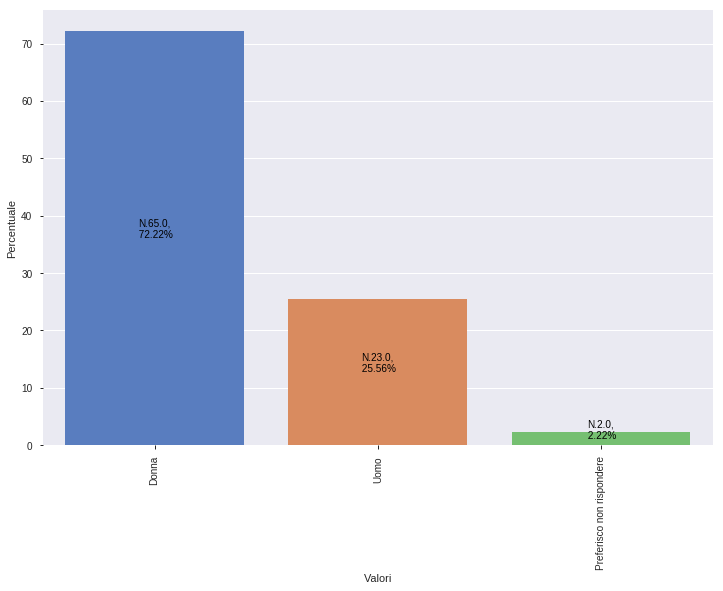

In [11]:
plot_dist_frequenza(dist_frequenza(questionario, 'A. Genere '))

In [12]:
help(tabella_di_contingenza)

Help on function tabella_di_contingenza in module marradi:

tabella_di_contingenza(dataframe, colonna_A, colonna_B, ordine_A=False, ordine_B=False, informativo=False, norm_axis=False)
    dataframe: inserire la tabella su cui si vuole fare la tabulazione incrociata
    colonna_A: inserire la stringa di testo che rappresenta l'intestazione della singola colonna
    colonna_B: inserire la stringa di testo che rappresenta l'intestazione della singola colonna
    ordine_A: inserire una lista di valori rappresentativi dell'ordine delle categorie della colonna A
    ordine_B: inserire una lista di valori rappresentativi dell'ordine delle categorie della colonna B
    iformativo: True, permette di avere in una stessa tabella frequenze, frequenze attese e scarti.



In [14]:
tabella_di_contingenza(questionario, 'A. Genere ', "Luogo oggetto dell'intervista")

Luogo oggetto dell'intervista  AZIENDA USL TOSCANA - Via Rozzalupi 57. Empoli  ...  All
A. Genere                                                                      ...     
Donna                                                                      30  ...   65
Preferisco non rispondere                                                   0  ...    2
Uomo                                                                        9  ...   23
All                                                                        39  ...   90

[4 rows x 7 columns]

## [Grafici Seaborn](https://seaborn.pydata.org/examples/index.html)

In [20]:
#https://seaborn.pydata.org/examples/index.html
ax = sns.barplot(y='S. Vi è un alta probabilità di formare relazioni sociali e contatti in questo spazio. ', x="Luogo oggetto dell'intervista", data=questionario)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Centro diurno “Totem” - Cooperativa il Girasole'),
 Text(0, 0, 'Residenza Universitaria Calamandrei'),
 Text(0, 0, 'Residenza Caponnetto'),
 Text(0, 0, 'AZIENDA USL TOSCANA - Via Rozzalupi 57. Empoli'),
 Text(0, 0, 'Azienda ASL Toscana Sud-Est - Via Donatori del Sangue nr. 62. Orbetello'),
 Text(0, 0, 'Azienda USL Toscana Sud Est - Via Donatori del Sangue nr. 62. Orbetello')]

In [23]:
g = sns.lmplot(x='A. Data di nascita',
                y="C. Percepisci l'area come sicura?",
                hue= 'A. Genere ',
                data=questionario);

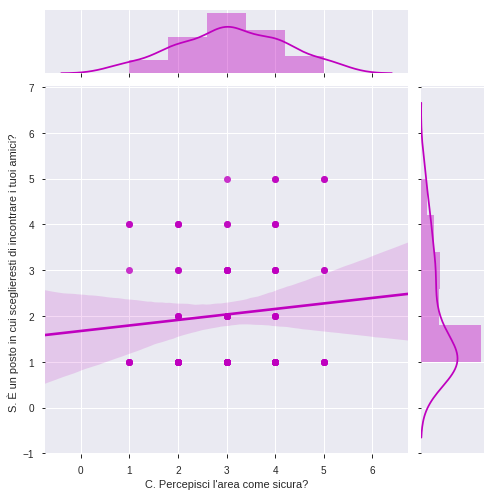

In [24]:
g = sns.jointplot(x = "C. Percepisci l'area come sicura?", y = 'S. È un posto in cui sceglieresti di incontrare i tuoi amici? ', data=questionario, kind="reg",
                   color="m", height=7)